In [6]:
%matplotlib notebook

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
concussion_2012_2014 = pd.read_csv("clean_concussion_2012_2014.csv")


In [16]:
concussion_2012_2014=pd.DataFrame(concussion_2012_2014)
concussion_2012_2014

,Unnamed: 0,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,16,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,No,Yes,8,2012/2013,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,387,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012/2013,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,388,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Comerback,No,No,4,2014/2015,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,389,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012/2013,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,390,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013/2014,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [113]:
games_missed=concussion_2012_2014["Games Missed"].value_counts()

In [114]:
games_missed=games_missed.sort_index()
games_missed

0.0     173
1.0     101
2.0      23
3.0       9
4.0       5
5.0       4
6.0       4
7.0       2
10.0      1
11.0      1
13.0      1
14.0      1
Name: Games Missed, dtype: int64

In [117]:
games_missed.plot(kind="bar", color="red")

# Set a title for the chart
plt.title("Number of Games Missed from Head Injury")
plt.xlabel("Number of Games Missed")
plt.ylabel("Number of Players")
plt.show()
plt.tight_layout()

In [45]:
head_injury=concussion_2012_2014[concussion_2012_2014["Reported Injury Type"]=="Head"]
head_injury

,Unnamed: 0,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
3,3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
5,17,Dennis Pitta,Baltimore Ravens,Baltimore Ravens vs. Pittsburgh Steelers (18/1...,18/11/2012,Pittsburgh Steelers,Tight End,No,Yes,11,2012/2013,1,0.0,No,Head,1,85 downs,46.44 downs
16,30,Joe Reitz,Indianapolis Colts,Indianapolis Colts vs. Detroit Lions (2/12/2012),2/12/2012,Detroit Lions,Guard,No,Yes,13,2012/2013,1,1.0,No,Head,3,64 downs,66.20 downs
22,37,Reggie Walker,Arizona Cardinals,St. Louis Rams vs. Arizona Cardinals (4/10/2012),4/10/2012,St. Louis Rams,Linebacker,No,No,5,2012/2013,1,2.0,No,Head,4,20 downs,28.75 downs
29,45,LaRon Byrd,Arizona Cardinals,St. Louis Rams vs. Arizona Cardinals (25/11/2012),25/11/2012,St. Louis Rams,Wide Receiver,No,No,12,2012/2013,1,2.0,No,Head,5,20 downs,1.00 downs
30,46,Bernard Pierce,Baltimore Ravens,Denver Broncos vs. Baltimore Ravens (16/12/2012),16/12/2012,Denver Broncos,Running Back,No,No,15,2012/2013,1,0.0,No,Head,6,22 downs,12.69 downs
31,47,Dunta Robinson,Atlanta Falcons,Tampa Bay Buccaneers vs. Atlanta Falcons (30/1...,30/12/2012,Tampa Bay Buccaneers,Comerback,No,No,17,2012/2013,1,0.0,No,Head,6,63 downs,62.00 downs
36,53,Billy Winn,Cleveland Browns,Cincinnati Bengals vs. Cleveland Browns (16/9/...,16/09/2012,Cincinnati Bengals,Defensive Tackle,No,No,2,2012/2013,1,0.0,No,Head,7,56 downs,69.00 downs
42,59,Dre Kirkpatrick,Cincinnati Bengals,Cincinnati Bengals vs. San Diego Chargers (2/1...,2/12/2012,San Diego Chargers,Comerback,No,Yes,13,2012/2013,1,4.0,No,Head,8,Did not return from injury,21.50 downs


In [52]:
concussion=concussion_2012_2014[concussion_2012_2014["Reported Injury Type"]=="Concussion"]
concussion

,Unnamed: 0,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
1,1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
4,16,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,No,Yes,8,2012/2013,1,0.0,No,Concussion,1,8 downs,14.43 downs
6,18,Shea McClellin,Chicago Bears,Houston Texans vs. Chicago Bears (11/11/2012),11/11/2012,Houston Texans,Defensive End,No,No,10,2012/2013,1,1.0,No,Concussion,1,27 downs,31.00 downs
7,19,Brent Celek,Philadelphia Eagles,Philadelphia Eagles vs. Tampa Bay Buccaneers (...,9/12/2012,Tampa Bay Buccaneers,Tight End,No,Yes,14,2012/2013,1,1.0,No,Concussion,1,64 downs,66.50 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,387,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012/2013,1,0.0,No,Concussion,85,90 downs,76.00 downs
321,388,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Comerback,No,No,4,2014/2015,1,1.0,No,Concussion,85,90 downs,78.00 downs
322,389,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012/2013,1,0.0,No,Concussion,87,70 downs,73.64 downs
323,390,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013/2014,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [86]:
games_missed_head=pd.DataFrame(head_injury["Games Missed"].value_counts())
games_missed_head.index.name = 'Number Games Missed'
games_missed_head

,Games Missed
Number Games Missed,
0.0,40
1.0,12
2.0,5
4.0,1
14.0,1
3.0,1


games_missed_concussion=pd.DataFrame(concussion.value_counts())
games_missed_concussion.index.name = 'Date'
games_missed_concussion

In [91]:
games_missed_concussion=pd.DataFrame(concussion["Games Missed"].value_counts())
games_missed_concussion.index.name = 'Number Games Missed'
games_missed_concussion

,Games Missed
Number Games Missed,
0.0,133
1.0,89
2.0,18
3.0,8
5.0,4
6.0,4
4.0,4
7.0,2
13.0,1


In [148]:
merge_df = pd.merge(games_missed_concussion, games_missed_head, on="Number Games Missed", how='outer')
merge_df_sort=merge_df.sort_index()
merge_df_sort=merge_df_sort.rename(columns={'Games Missed_x':'Concussion', 'Games Missed_y':'Head Injury'})
merge_df_sort

,Concussion,Head Injury
Number Games Missed,,
0.0,133.0,40.0
1.0,89.0,12.0
2.0,18.0,5.0
3.0,8.0,1.0
4.0,4.0,1.0
5.0,4.0,NaN
6.0,4.0,NaN
7.0,2.0,NaN
10.0,1.0,NaN


<IPython.core.display.Javascript object>


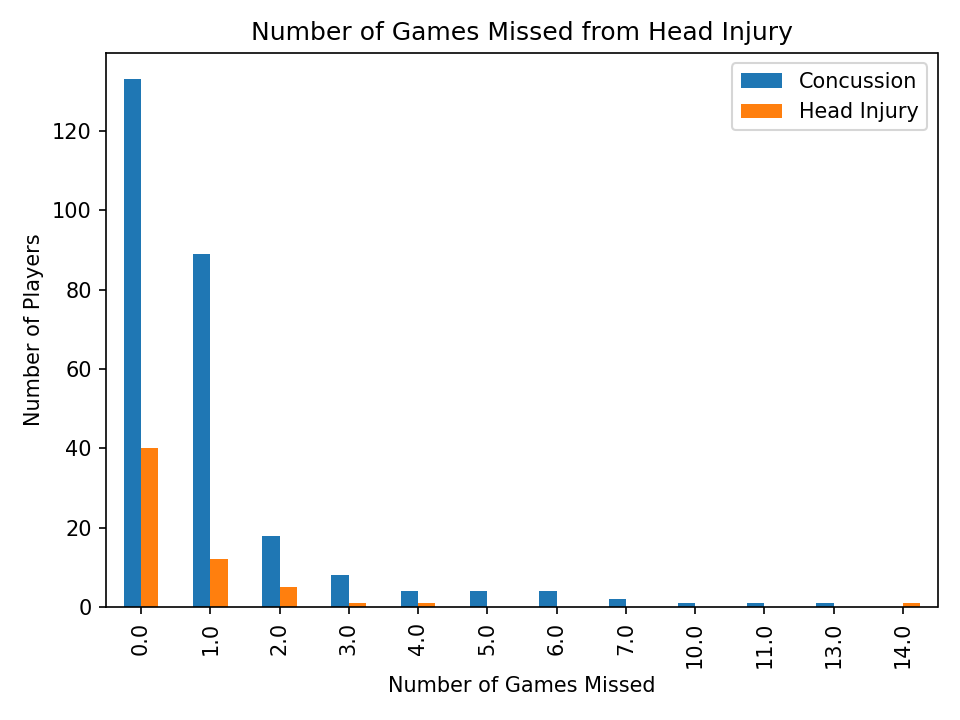

In [149]:
merge_df_sort.plot(kind="bar")

# Set a title for the chart
plt.title("Number of Games Missed from Head Injury")
plt.xlabel("Number of Games Missed")
plt.ylabel("Number of Players")
plt.show()
plt.tight_layout()

,Unnamed: 0,Player,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
Team,,,,,,,,,,,,,,,,,
Arizona Cardinals,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Atlanta Falcons,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Baltimore Ravens,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Buffalo Bills,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Carolina Panthers,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Chicago Bears,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Cincinnati Bengals,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Cleveland Browns,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Dallas Cowboys,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [147]:
num_injury=concussion_2012_2014["Team"].value_counts()
num_injury=pd.DataFrame(num_injury)
num_injury.rename(columns={'Team':'Number of Injuries'})

#num_injury=num_injury.index.name='Number Games Missed'

,Number of Injuries
Jacksonville Jaguars,21
Cleveland Browns,18
Oakland Raiders,17
Kansas City Chiefs,14
Washington Redskins,12
St. Louis Rams,12
New England Patriots,12
San Francisco 49ers,12
Cincinnati Bengals,12
Minnesota Vikings,12


In [ ]:
num_injury=num_injury.index.name='Number Games Missed'

In [1]:
clean_concussion_2012_2014["Weeks Injured"].nunique()

NameError: name 'clean_concussion_2012_2014' is not defined

In [24]:
team_success_concussion = clean_concussion_2012_2014.loc[:,['Team', 'Date', 'Opposing Team', 'Winning Team?',]]
team_success_concussion

,Team,Date,Opposing Team,Winning Team?
0,Washington Redskins,30/09/2012,Tampa Bay Buccaneers,Yes
1,San Diego Chargers,22/09/2013,Tennessee Titans,No
2,Buffalo Bills,28/09/2014,Houston Texans,No
3,New England Patriots,12/10/2014,Buffalo Bills,Yes
16,San Francisco 49ers,29/10/2012,Arizona Cardinals,Yes
...,...,...,...,...
387,San Diego Chargers,25/11/2012,Baltimore Ravens,No
388,Tennessee Titans,28/09/2014,Indianapolis Colts,No
389,Green Bay Packers,23/12/2012,Tennessee Titans,Yes
390,New England Patriots,8/12/2013,Cleveland Browns,Yes
